# Task 32: KMeans Clustering in Python:

**K-Means Clustering** is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters. There is no labeled data for this clustering, unlike in supervised learning. K-Means performs the division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster.

- K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters.
- It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster.
- After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster.

The term ‘K’ is a number. You need to tell the system how many clusters you need to create. For example, K = 2 refers to two clusters. There is a way of finding out what is the best or optimum value of K for a given data.
<br>

In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.

*Objective: The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.*

### Importing Module & Libraries:

In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

### Data Preparation:

In [2]:
df = data("sat.act")
df = df.dropna(how="any")
df.head()

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0


### Determine the No. of Clusters:

It is difficult to determine how many clusters to use for the analysis. However, there are several different ways to approach this.
<br>
One of the method is *Elbow Method*. The *Elbow Method* uses the sum of squares distance as it runs multiple models with multiple no. of clusters. The optimal number of clusters is where there is a break or noticeable decline in the slope of the amount of sum of square distance.

In [3]:
distortions = []
K = range(1,10) # no. of clusters
for k in K:
    kmean_model = KMeans(n_clusters=k).fit(df)
    distortions.append(sum(np.min(cdist(df,
                                        kmean_model.cluster_centers_, 'euclidean'),
                                 axis=1)) / df.shape[0])
print(distortions)

[138.75344536281915, 96.17431511474145, 78.39883245502338, 71.24402967704194, 65.49021000527263, 60.21264280285937, 56.24839892184141, 52.41730898390825, 50.486530653481736]


Plot the results for better understanding

Text(0.5, 1.0, 'The Elbow Method showing the Optimal k')

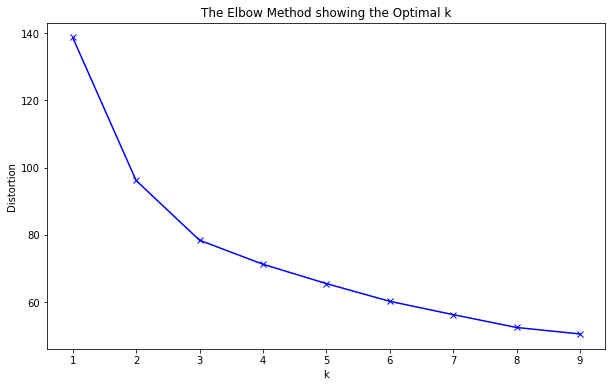

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the Optimal k')

It appears that 3 clusters should be enough for this analysis.

### Create KMeans Clusters:

In [5]:
# create kmeans model with 3 clusters
km = KMeans(3, init='k-means++', random_state=3425)
km.fit(df.values)

KMeans(n_clusters=3, random_state=3425)

In [6]:
# adding new column 'predict'
df['predict'] = km.predict(df.values)
df[:5]

,gender,education,age,ACT,SATV,SATQ,predict
29442,2,3,19,24,500,500.0,2
29457,2,3,23,35,600,500.0,0
29498,2,3,20,21,480,470.0,2
29503,1,4,27,26,550,520.0,0
29504,1,2,33,31,600,550.0,0


### Descriptive Stats:

Averages by various groups.

In [7]:
print(df.groupby('predict').ACT.mean())
print(df.groupby('predict').age.mean())
print(df.groupby('predict').SATV.mean())
print(df.groupby('predict').SATQ.mean())
print(df.groupby('predict').education.mean())

predict
0    27.531136
1    31.547945
2    23.655738
Name: ACT, dtype: float64
predict
0    26.761905
1    24.921233
2    24.852459
Name: age, dtype: float64
predict
0    590.391941
1    703.202055
2    443.950820
Name: SATV, dtype: float64
predict
0    582.963370
1    705.520548
2    443.098361
Name: SATQ, dtype: float64
predict
0    3.336996
1    3.164384
2    2.819672
Name: education, dtype: float64


#### Visualization:

<AxesSubplot:xlabel='predict'>

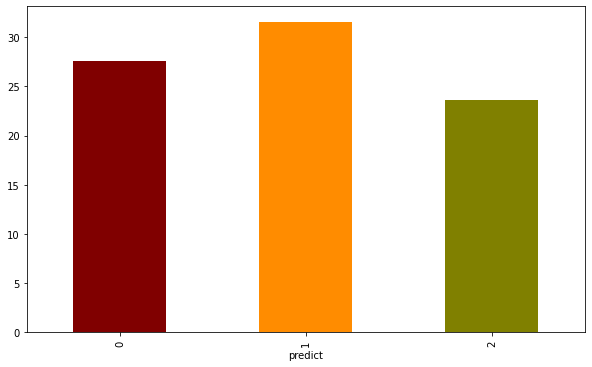

In [9]:
plt.figure(figsize=(10,6))
(df.groupby('predict').ACT.mean()).plot(kind='bar', color=['maroon', 'darkorange', 'olive'])

#### By Gender:

In [12]:
print(pd.crosstab(df['predict'],df['gender']))

gender     1    2
predict          
0         83  190
1        119  173
2         43   79


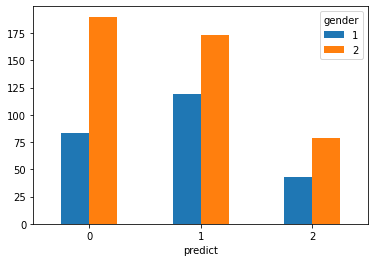

In [15]:
crosstb = pd.crosstab(df['predict'],df['gender'])
# creating bar plot
barplot = crosstb.plot.bar(rot=0)

#### By Education:

In [16]:
print(pd.crosstab(df['predict'],df['education']))

education   0   1   2    3   4   5
predict                           
0          18  14  16   99  62  64
1          25  18  15  120  54  60
2          13  11  12   50  21  15


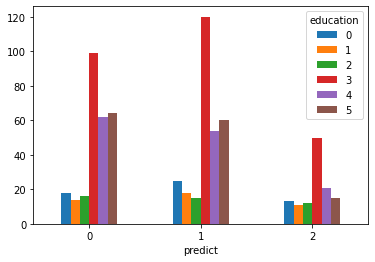

In [17]:
crosstb_2 = pd.crosstab(df['predict'],df['education'])
# creating bar plot
barplot = crosstb_2.plot.bar(rot=0)

### Visual of Clusters:

For interpretation we need to give each of our clusters a name. We do this by mapping the values.

In [18]:
clust_map = {2:'Weak', 0:'Average', 1:'Strong'}
df['perf'] = df.predict.map(clust_map)
df.head()

,gender,education,age,ACT,SATV,SATQ,predict,perf
29442,2,3,19,24,500,500.0,2,Weak
29457,2,3,23,35,600,500.0,0,Average
29498,2,3,20,21,480,470.0,2,Weak
29503,1,4,27,26,550,520.0,0,Average
29504,1,2,33,31,600,550.0,0,Average


In [19]:
d_color = {'Weak':'g', 'Average':'y', 'Strong':'r' }
d_color

{'Weak': 'g', 'Average': 'y', 'Strong': 'r'}

Now, we give each group a color

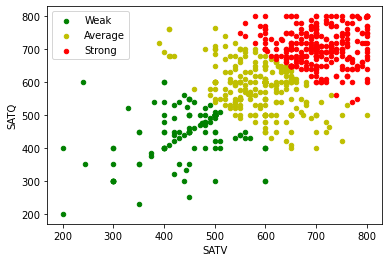

In [23]:
fig, ax=plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.perf==clust].plot(kind='scatter', x='SATV', y='SATQ', label=clust, ax=ax, color=color)